<a href="https://colab.research.google.com/github/Meena-Mani/batch_size_characterization/blob/master/batch_size_characterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effect of batch size on validation accuracy


**Tags: batch size, mini batch size, test accuracy, SGD, aerial image classification**

Date created: Mar 25, 2019   
Last modified: April 21, 2019 

The batch size in gradient descent optimization, is an important hyperparameter next only to the learning rate. In stochastic gradient descent (SGD), the batch size is a subset of the full training set and is referred to as the mini-batch size. Empirical results show that the mini-batch size affects the size of the generalization gap (the gap between the training and test accuracy) by as much as 5% <a href="#ref1">[1 pg. 2]</a>. Smaller batches (SB) have a narrower gap and the common explanation offered is that smaller mini-batches add noise to the gradient estimation;  this has a regularizing effect which allows the model to generalize better. Larger mini-batches (LB), on the other hand, have a smaller variance and the stochastic gradient updates are less noisy. 
Keskar et al. <a href="#ref1">[1]</a> did experiments that support this view. They showed that SB models consistently converge to flat minima while LB models tend to  converge to a sharp minimizer which leads to poorer generalization.

There is great interest in improving the generalization performance of large minibatches because LB distributed SGD is a way to accelerate training. Some progress has been made. In 2017, a paper from FAIR <a href="#ref2">[2]</a> showed that networks trained with large minibatches have good generalization with no loss of accuracy for minibatch sizes upto 8192 images. To achieve this a linear scaling rule for the learning rate was applied to the minibatch size. New warmup and batch normalization schemes were also devised.

In this exercise, we characterize the training and validation accuracy for batch sizes in the *16 - 128* regime. 


#### Method
We set up our experiments within a transfer learning classification framework using the MobileNetV2 architecture with pretrained ImageNet weights and TensorFlow 2.0. The training is done in two stages: feature extraction (TL) and fine-tuning (FT). The model is trained for 20 epochs, split 10/10 for each stage.

We use the following batch sizes: 16, 32, 64, 128. Note that the batch size is a power of two. This practice is followed to utilize memory  more efficiently. (See [this](https://software.intel.com/en-us/articles/cifar-10-classification-using-intel-optimization-for-tensorflow) characterization on Intel hardware <a href="#ref3">[3]</a>).

For each batch size, we perform three trial runs and the average of these runs is plotted.

Since there is an interplay between learning rate and batch size, we keep the learning rate constant to observe trends along a single dimension.


### Imports

In [3]:
!pip install seaborn==0.9.0

In [4]:
import seaborn as sns
sns.set(style="darkgrid")
print('The Seaborn version is: ', sns.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

The Seaborn version is:  0.9.0


### Data for plots

We use the [Aerial Cactus Identification Challenge](https://www.kaggle.com/c/aerial-cactus-identification) dataset on Kaggle. This is a binary classication task. There are 17,500 training images, each 32 x 32 in size.  We divide the training data into a training set of 14,000 images and a validation set of 3,500 images. 


The batch size experimentation data (recorded below) is a outer product of 3 trial runs and minibatch size where minibatch size = 16, 32, 64, 128. This gives a total of 12 (3 x 4) runs.

Each trial was run under the following specifications:
- architecture: MobileNet V2
- input image size: 96
- TL learning rate: RMSprop (lr=0.0001)
- FT learning rate: RMSprop (lr=2e-5)
- run time: 20 epochs (10 TL + 10 FT)


In [0]:
#@title
bs16_tl_run1 = {'accuracy': [0.87064284,
  0.93714285,
  0.9465,
  0.948,
  0.94935715,
  0.95264286,
  0.9565714,
  0.9562857,
  0.953,
  0.95535713],
 'loss': [0.2911452436106546,
  0.16167652438155242,
  0.1353548918409007,
  0.12918555895664863,
  0.12643418638621057,
  0.12058200530282089,
  0.11099365075411541,
  0.11258263398227947,
  0.11852958734014205,
  0.10790443666332535],
 'val_accuracy': [0.5665138,
  0.73652524,
  0.82884175,
  0.9025229,
  0.9395069,
  0.96272933,
  0.9704702,
  0.97391057,
  0.97591746,
  0.9767775],
 'val_loss': [0.8961231209542773,
  0.6124050756660077,
  0.39432962308851405,
  0.23677038515858148,
  0.14639172780780343,
  0.10200962936078463,
  0.0836400475263288,
  0.07709764471969678,
  0.06546263492649096,
  0.06595284897735804]}

bs16_ft_run1 = {'accuracy': [0.9535,
  0.9702143,
  0.97664285,
  0.97735715,
  0.9820714,
  0.98314285,
  0.9867143,
  0.9862857,
  0.98707145,
  0.9868571],
 'loss': [0.12036714440424527,
  0.07744745465677365,
  0.0631644084275301,
  0.057337736547192826,
  0.04748802282109058,
  0.04723876364096733,
  0.03653699521775291,
  0.03999490165637274,
  0.034808795533413234,
  0.03828833180238559],
 'val_accuracy': [0.98451835,
  0.97391057,
  0.9779243,
  0.9805046,
  0.9724771,
  0.98652524,
  0.9802179,
  0.9787844,
  0.98136467,
  0.98451835],
 'val_loss': [0.045476502507130416,
  0.07302202611113365,
  0.06332041424180598,
  0.05696888132567663,
  0.07895559846696448,
  0.04424289123088692,
  0.058896255490203615,
  0.06279271812541959,
  0.05566804818572397,
  0.049489772901625]}

bs16_tl_run2 = {'accuracy': [0.8745,
  0.9315714,
  0.943,
  0.9489286,
  0.9520714,
  0.95214283,
  0.95442855,
  0.9522143,
  0.95535713,
  0.9589286],
 'loss': [0.28462860353929653,
  0.16653705228652274,
  0.14218426547944546,
  0.12924725645141943,
  0.12129418991718974,
  0.11647321582106607,
  0.11472073954130922,
  0.12057451482117176,
  0.10892141006461212,
  0.1043824466999088],
 'val_accuracy': [0.67058486,
  0.7775229,
  0.83715594,
  0.90108943,
  0.9478211,
  0.96358943,
  0.9713303,
  0.9719037,
  0.9730505,
  0.97448397],
 'val_loss': [0.6941260694773919,
  0.5022691964009486,
  0.3841440235905418,
  0.23826279718463028,
  0.14216640504897324,
  0.09782911206108577,
  0.0767740657875622,
  0.07151690748340767,
  0.07088389382120905,
  0.06613775722387699]}

bs16_ft_run2 = {'accuracy': [0.9565714,
  0.9685714,
  0.97235715,
  0.9812857,
  0.98157144,
  0.98321426,
  0.9858571,
  0.9875,
  0.9875,
  0.9893571],
 'loss': [0.11419473954330066,
  0.08412625538105412,
  0.07404368323866012,
  0.05225114005138831,
  0.04964301381168688,
  0.04708592708969289,
  0.041084439185564404,
  0.035955198631081396,
  0.034601972787882136,
  0.03032324403649961],
 'val_accuracy': [0.98165137,
  0.9779243,
  0.97477067,
  0.9698968,
  0.97419727,
  0.9776376,
  0.98509175,
  0.9787844,
  0.98365825,
  0.98193806],
 'val_loss': [0.047214990360913325,
  0.0646419524257349,
  0.06916197784956056,
  0.08338472438581532,
  0.06964278386361361,
  0.05926596860958978,
  0.04963968202597294,
  0.06230241338715866,
  0.049152749713490984,
  0.05441147965043164]}

bs16_tl_run3 = {'accuracy': [0.865,
  0.9302143,
  0.9445,
  0.94685715,
  0.95185715,
  0.95092857,
  0.95185715,
  0.95614284,
  0.95757145,
  0.955],
 'loss': [0.31037681554044994,
  0.1688879259100982,
  0.1445380600243807,
  0.13477319957209485,
  0.12544009400425213,
  0.12191181042417884,
  0.12159377507013934,
  0.11013629055076411,
  0.10834272794319051,
  0.11133676458708942],
 'val_accuracy': [0.803039,
  0.790711,
  0.8718463,
  0.91255736,
  0.9420872,
  0.96186924,
  0.9704702,
  0.97563076,
  0.97477067,
  0.97563076],
 'val_loss': [0.42936542524246996,
  0.47432464456886325,
  0.31510913710391847,
  0.22074281444790167,
  0.15257446706260835,
  0.10037364035742272,
  0.0859642666892721,
  0.07211309995442423,
  0.07250227129894284,
  0.0669832965508616]}

bs16_ft_run3 = {'accuracy': [0.95685714,
  0.96814287,
  0.9744286,
  0.9787143,
  0.98228574,
  0.98228574,
  0.9854286,
  0.9857857,
  0.989,
  0.9894286],
 'loss': [0.10793602335932,
  0.08405614720205111,
  0.06348255743691698,
  0.0597125234787818,
  0.05121524138725363,
  0.04961703135876451,
  0.03875390195108983,
  0.03877328051788001,
  0.033108791569249924,
  0.028905872714053007],
 'val_accuracy': [0.98136467,
  0.9733372,
  0.98107797,
  0.9787844,
  0.9784977,
  0.98509175,
  0.98709863,
  0.97620416,
  0.9653096,
  0.97477067],
 'val_loss': [0.051144275182821795,
  0.07754652937922259,
  0.052664050124386706,
  0.062223840614090836,
  0.06379934977176663,
  0.04710574183964711,
  0.04196766133196817,
  0.07148891179357791,
  0.10556290172058619,
  0.07304021888534691]}

In [0]:
#@title
bs32_tl_run1 = {'accuracy': [0.8344788,
  0.9339204,
  0.9474513,
  0.9525344,
  0.9579038,
  0.96005154,
  0.95926404,
  0.9645619,
  0.96470505,
  0.9686426],
 'loss': [0.35984536592356803,
  0.17041620831480003,
  0.13637029625398597,
  0.12204694049806256,
  0.1090819665101727,
  0.10232595389309891,
  0.10231104448762,
  0.09193665972075511,
  0.08985911349831031,
  0.08387306939174698],
 'val_accuracy': [0.67115825,
  0.7726491,
  0.7838303,
  0.8142202,
  0.83830273,
  0.8793005,
  0.9154243,
  0.9257454,
  0.940367,
  0.9572821],
 'val_loss': [0.6127154747827337,
  0.4849992267308979,
  0.49377178421261114,
  0.44012675810297697,
  0.39149038890086185,
  0.29019935709347416,
  0.21886295592839564,
  0.18833985541938641,
  0.14986116580938527,
  0.10337813939352375]}

bs32_ft_run1 = {'accuracy': [0.9376432,
  0.94093645,
  0.94057846,
  0.94351375,
  0.9467354,
  0.9484536,
  0.94831043,
  0.9478093,
  0.9498854,
  0.94573313],
 'loss': [0.15380810587778942,
  0.14925256413743668,
  0.14402284761645404,
  0.139871293207351,
  0.1334594936864312,
  0.13200698697135144,
  0.12875411871133666,
  0.13161267120847725,
  0.12727002581882313,
  0.13146686634605692],
 'val_accuracy': [0.9483945,
  0.9478211,
  0.9486812,
  0.95040137,
  0.95154816,
  0.95240825,
  0.95212156,
  0.95355505,
  0.95326835,
  0.95412844],
 'val_loss': [0.13372445289353166,
  0.13309387102244644,
  0.1335456630368845,
  0.12892279970468185,
  0.12613787442240693,
  0.1244632440593538,
  0.1256358133406814,
  0.12202540506531886,
  0.12341903867798114,
  0.11948355653007096]}
  
bs32_tl_run2 = {'accuracy': [0.8273912,
  0.9272623,
  0.9438001,
  0.9503866,
  0.95733106,
  0.95718783,
  0.96069586,
  0.9623425,
  0.9623425,
  0.96463346],
 'loss': [0.3663732253125989,
  0.18165932515505936,
  0.14373294069492532,
  0.12266943243599976,
  0.10904423146373149,
  0.11181127518108211,
  0.10131479570383946,
  0.10258503959547272,
  0.09662053692031904,
  0.09066531712665113],
 'val_accuracy': [0.696961,
  0.7178899,
  0.7296445,
  0.77494264,
  0.8136468,
  0.8557913,
  0.90080273,
  0.92144495,
  0.9415138,
  0.95584863],
 'val_loss': [0.6082158826906746,
  0.6339343031612011,
  0.6565998866470582,
  0.5566296473555609,
  0.4664101059283685,
  0.36155006733782796,
  0.25421345124550915,
  0.2069462580486722,
  0.1497518422099155,
  0.1103877622480376]}
  
bs32_ft_run2 = {'accuracy': [0.9598368,
  0.97494274,
  0.9776632,
  0.98446447,
  0.9839634,
  0.98632586,
  0.9865407,
  0.98811567,
  0.9897623,
  0.99069303],
 'loss': [0.10108433176100869,
  0.06576820724363197,
  0.05842380971703273,
  0.043663524626247494,
  0.043192576287425774,
  0.03558864506515744,
  0.03423224981497645,
  0.03102298145242972,
  0.027214268036893453,
  0.02920151930567083],
 'val_accuracy': [0.9776376,
  0.98423165,
  0.98165137,
  0.9779243,
  0.9770642,
  0.96186924,
  0.9386468,
  0.959289,
  0.96875,
  0.9661697],
 'val_loss': [0.06201676665506232,
  0.04860165902229727,
  0.05668150433211015,
  0.07554668855186927,
  0.06982925669674617,
  0.1265990173384342,
  0.19757957148169158,
  0.13485966973143435,
  0.10202709179790263,
  0.1116091350794112]}
'''
redo
bs32_tl_run3 = {'accuracy': [0.8508018,
  0.937142,
  0.94823885,
  0.95045817,
  0.95704466,
  0.95811856,
  0.9612686,
  0.96076745,
  0.9624141,
  0.96620846],
 'loss': [0.3374981694136835,
  0.16890170054781206,
  0.13560585259862099,
  0.12554066683691664,
  0.11131592021501897,
  0.10460650638590768,
  0.10312112444053742,
  0.09991891714578914,
  0.09631302319083017,
  0.08860835440473937],
 'val_accuracy': [0.5,
  0.57568806,
  0.73337156,
  0.7543005,
  0.82024086,
  0.8744266,
  0.8861812,
  0.92230505,
  0.9352064,
  0.95154816],
 'val_loss': [0.8527140297474117,
  0.8553579523475892,
  0.5854629015703814,
  0.5501955103710157,
  0.4275810415044837,
  0.30480811293792287,
  0.2780442401903485,
  0.19791334590643916,
  0.15614076240688834,
  0.12451998175147476]}
'''
bs32_tl_run3 = {'accuracy': [0.84894043,
  0.93442154,
  0.9473797,
  0.9556844,
  0.9576174,
  0.95997995,
  0.9633448,
  0.9629868,
  0.9649198,
  0.96628004],
 'loss': [0.34295139182679024,
  0.17236134806756712,
  0.13647357045853126,
  0.1178724202588798,
  0.10912566103749533,
  0.10471072924010806,
  0.09982238931822476,
  0.09577916618671273,
  0.0882996438329299,
  0.08724887981554248],
 'val_accuracy': [0.7385321,
  0.7176032,
  0.7505734,
  0.7932913,
  0.8325688,
  0.84919727,
  0.88159406,
  0.9174312,
  0.94466746,
  0.95154816],
 'val_loss': [0.5749243038509964,
  0.6636588398469697,
  0.5816218374519173,
  0.48966456498574773,
  0.40854767074278736,
  0.368703457398699,
  0.2966810773818865,
  0.209257172984541,
  0.14313298224582585,
  0.12056906328220433]}

bs32_ft_run3 = {'accuracy': [0.9619845,
  0.9740836,
  0.9802405,
  0.98374856,
  0.98303264,
  0.98775774,
  0.98747134,
  0.9889748,
  0.98883164,
  0.9901203],
 'loss': [0.0978278547358984,
  0.06941852278320411,
  0.052357233038763135,
  0.04597528330634486,
  0.044624103075197395,
  0.03276674614358856,
  0.03518490943616845,
  0.030986445574481936,
  0.029699958325070323,
  0.02473126676269377],
 'val_accuracy': [0.97620416,
  0.98251146,
  0.9678899,
  0.9693234,
  0.9483945,
  0.93205273,
  0.9590023,
  0.9678899,
  0.96129584,
  0.9807913],
 'val_loss': [0.06874846480359588,
  0.05417498169518119,
  0.09894317676475563,
  0.09244729607545454,
  0.16711129959023327,
  0.22079744295926268,
  0.12067731955182662,
  0.10519197682311776,
  0.1277909701980582,
  0.0617575440101898]}

In [0]:
#@title
bs64_tl_run1 = {'accuracy': [0.7571757,
  0.9194173,
  0.94524974,
  0.95099026,
  0.9583812,
  0.95988804,
  0.96534157,
  0.96555686,
  0.964624,
  0.967566],
 'loss': [0.4873410956730936,
  0.21189897954806122,
  0.1486061984239024,
  0.12689128551465362,
  0.1124388110427235,
  0.10265867208503829,
  0.09529256231732128,
  0.09080223985076225,
  0.09036328514394201,
  0.08492052550807201],
 'val_accuracy': [0.5570023,
  0.5167824,
  0.6284722,
  0.645544,
  0.693287,
  0.7109375,
  0.7514468,
  0.7766204,
  0.8070023,
  0.8203125],
 'val_loss': [0.7020423037034494,
  0.8353448245260451,
  0.7580955613542486,
  0.8004246961187433,
  0.7303342057598962,
  0.696820992562506,
  0.6080415889068886,
  0.5492833643047897,
  0.48070010929195967,
  0.4463806086116367]}

bs64_ft_run1 = {'accuracy': [0.9393657,
  0.9400115,
  0.9448909,
  0.94417334,
  0.9465413,
  0.94524974,
  0.94797647,
  0.9505597,
  0.94819176,
  0.94682837],
 'loss': [0.1478677139661342,
  0.14545677621110026,
  0.13857497740216151,
  0.1364939676942015,
  0.13393558026318161,
  0.13405865851691343,
  0.12751424974675293,
  0.12245557642831595,
  0.1269484387045613,
  0.12791769377604964],
 'val_accuracy': [0.8032407,
  0.8023727,
  0.8046875,
  0.8093171,
  0.8070023,
  0.8125,
  0.8162616,
  0.8179977,
  0.8206019,
  0.8206019],
 'val_loss': [0.49213768431433924,
  0.5009865915333783,
  0.4995427093020192,
  0.4861144605610106,
  0.48693158725897473,
  0.47530047761069405,
  0.4670082176173175,
  0.4628694758371071,
  0.45723376892231127,
  0.45962414145469666]}


bs64_tl_run2 = {'accuracy': [0.7756171,
  0.91446614,
  0.9405138,
  0.9520666,
  0.95744836,
  0.96261483,
  0.9657003,
  0.9657003,
  0.9685706,
  0.96677667],
 'loss': [0.459646385039035,
  0.22074482696885767,
  0.15939200932136496,
  0.12906261590810922,
  0.11529668828581559,
  0.10307692835614274,
  0.09504354732318532,
  0.09129326217449628,
  0.08694896364561042,
  0.08528928010030537],
 'val_accuracy': [0.4375,
  0.4814815,
  0.5633681,
  0.6218171,
  0.6880787,
  0.6970486,
  0.7546296,
  0.7824074,
  0.7864583,
  0.8313079],
 'val_loss': [0.8660909809448101,
  0.9080997197716324,
  0.8849592319241276,
  0.8589225930196268,
  0.7366482207068691,
  0.7424115946999302,
  0.59798571853726,
  0.5453326713155817,
  0.5549266189336777,
  0.42827367782592773]}

bs64_ft_run2 = {'accuracy': [0.96261483,
  0.9765356,
  0.98421353,
  0.98414177,
  0.98765785,
  0.9888777,
  0.9907434,
  0.99081516,
  0.99131745,
  0.991461],
 'loss': [0.09426334694062118,
  0.060466249168654805,
  0.04420921789860753,
  0.04126216103157069,
  0.035568616625635825,
  0.02979973775369942,
  0.02442334670665429,
  0.026469444982754546,
  0.02366195352807915,
  0.024291302721164736],
 'val_accuracy': [0.837963,
  0.8721065,
  0.8865741,
  0.8796296,
  0.9114583,
  0.8833912,
  0.8903356,
  0.8504051,
  0.8732639,
  0.8550347],
 'val_loss': [0.45367079614489164,
  0.38777567197879154,
  0.37967091384861207,
  0.4242444176364828,
  0.30612780864316,
  0.46326085676749545,
  0.44855285932620365,
  0.6191194107135137,
  0.5129484197607747,
  0.5984594877119418]}

bs64_tl_run3 = {'accuracy': [0.81623137,
  0.9240815,
  0.9474024,
  0.95228183,
  0.95888346,
  0.96139497,
  0.96354765,
  0.9661309,
  0.96914464,
  0.96749425],
 'loss': [0.39479750463253593,
  0.19884838788298598,
  0.145887238697398,
  0.12833928691499133,
  0.11229617537847206,
  0.10322463615069297,
  0.0956172008157187,
  0.0909739029428031,
  0.08445914445528344,
  0.08213183941184858],
 'val_accuracy': [0.7592593,
  0.6296296,
  0.6785301,
  0.6779514,
  0.6892361,
  0.7193287,
  0.7563657,
  0.7699653,
  0.7916667,
  0.8107639],
 'val_loss': [0.5047256494009936,
  0.768576134134222,
  0.7530755091596533,
  0.800284778630292,
  0.7699583559124558,
  0.6873726579878066,
  0.6011531077049397,
  0.5647618759561468,
  0.5149792990198842,
  0.4758393229157836]}

bs64_ft_run3 = {'accuracy': [0.9634759,
  0.9778272,
  0.9826349,
  0.9830654,
  0.98945177,
  0.98851895,
  0.99067163,
  0.99038464,
  0.9900976,
  0.9911739],
 'loss': [0.09298580034874405,
  0.057448722556849297,
  0.04788088033790566,
  0.04587991693806669,
  0.033113211315033274,
  0.03291574880495736,
  0.026267605687221075,
  0.025538377580901203,
  0.027054362783334663,
  0.024629553691746003],
 'val_accuracy': [0.8608218,
  0.8423032,
  0.8573495,
  0.849537,
  0.8706597,
  0.8443287,
  0.8506944,
  0.8382523,
  0.8356481,
  0.823206],
 'val_loss': [0.3978591547520072,
  0.5055145422617594,
  0.47920796026786167,
  0.5281145365701782,
  0.46922935986960373,
  0.5613441500398848,
  0.5910206848272571,
  0.7088823666175207,
  0.7178004086017609,
  0.7376902478712576]}

In [0]:
#@title
bs128_tl_run1 = {'accuracy': [0.724481,
  0.88638985,
  0.92438006,
  0.93901384,
  0.9519175,
  0.9541522,
  0.95869374,
  0.9631632,
  0.9628748,
  0.966263],
 'loss': [0.5419392908183212,
  0.29271266950593,
  0.2058690619991175,
  0.16669081467726926,
  0.13821915612741875,
  0.1274932838606862,
  0.11428026195009687,
  0.10372524840849631,
  0.10068286900787755,
  0.09410516635838127],
 'val_accuracy': [0.47077546,
  0.473669,
  0.5248843,
  0.5601852,
  0.5494792,
  0.6171875,
  0.6423611,
  0.6345486,
  0.6921296,
  0.7037037],
 'val_loss': [0.7536150283283658,
  0.8241650307620013,
  0.8620337645212809,
  0.8831379170770999,
  0.9900171226925321,
  0.8833401203155518,
  0.8688808414671156,
  0.9363355680748269,
  0.78112291848218,
  0.754410481011426]}

bs128_ft_run1 = {'accuracy': [0.96100056,
  0.9765715,
  0.981113,
  0.9855104,
  0.98752886,
  0.9872405,
  0.9888264,
  0.99091697,
  0.99156576,
  0.9924308],
 'loss': [0.09874152178170359,
  0.06224135872333245,
  0.05064754019198121,
  0.03855030116815262,
  0.0325072388000348,
  0.03453698790403386,
  0.028649205965770898,
  0.026975036685751384,
  0.02429635245181113,
  0.02174919641511182],
 'val_accuracy': [0.7471065,
  0.6770833,
  0.7184606,
  0.7016782,
  0.7416088,
  0.6990741,
  0.6912616,
  0.6603009,
  0.7612847,
  0.7751736],
 'val_loss': [0.7043439657599838,
  1.0292232433954875,
  0.9324952606801633,
  1.1040891872511969,
  0.935977679711801,
  1.1521965618486758,
  1.1994845977535955,
  1.3963210891794275,
  0.9631057138796206,
  0.8987921211454604]}

bs128_tl_run2 = {'accuracy': [0.79483855,
  0.89158016,
  0.9274798,
  0.9415369,
  0.9491782,
  0.96100056,
  0.9607843,
  0.9644495,
  0.9666473,
  0.9684977],
 'loss': [0.43822029989208455,
  0.26706571834035125,
  0.19503877512173945,
  0.15904123835360165,
  0.13512609480539683,
  0.11555434527109788,
  0.10883702222588704,
  0.10070086697782946,
  0.0949452098571369,
  0.0901119350922974],
 'val_accuracy': [0.7994792,
  0.8961227,
  0.8599537,
  0.806713,
  0.7514468,
  0.7369792,
  0.7002315,
  0.7219329,
  0.7282986,
  0.7465278],
 'val_loss': [0.39458569553163314,
  0.3328370220131344,
  0.3760841323269738,
  0.43959417939186096,
  0.5328430478219632,
  0.5629856553342607,
  0.6492042342821757,
  0.6133657495180765,
  0.6207293547965862,
  0.5877926581435733]}

bs128_ft_run2 = {'accuracy': [0.9625144,
  0.97750866,
  0.9820502,
  0.98406863,
  0.9864475,
  0.98810554,
  0.9907007,
  0.990754,
  0.99282193,
  0.99120533],
 'loss': [0.09587667048011822,
  0.06274712499931472,
  0.04582434588873538,
  0.04258351481810745,
  0.03713595436621702,
  0.031112922864698623,
  0.028310530448403325,
  0.02495809459905012,
  0.02074175657436528,
  0.02306392675882255],
 'val_accuracy': [0.7514468,
  0.7459491,
  0.7627315,
  0.7879051,
  0.7254051,
  0.7609954,
  0.7664931,
  0.7251157,
  0.7427662,
  0.7057292],
 'val_loss': [0.6495121496695059,
  0.734767410490248,
  0.732969688044654,
  0.7049078212844001,
  0.9561179412735833,
  0.8790578135737667,
  0.8465745603596723,
  1.011414697876683,
  1.0432018505202398,
  1.2868503861957126]}

bs128_tl_run3 = {'accuracy': [0.7449539,
  0.8814158,
  0.92151666,
  0.94098026,
  0.9496107,
  0.95581025,
  0.9594867,
  0.9623702,
  0.9639562,
  0.96842563],
 'loss': [0.5078822168099426,
  0.2926299859014487,
  0.20900720166503836,
  0.16250616371666196,
  0.13851891112575068,
  0.12576766932574385,
  0.11394753005471608,
  0.10610050602355219,
  0.09937617859900891,
  0.09084265536898285],
 'val_accuracy': [0.5538194,
  0.5445602,
  0.5462963,
  0.5691551,
  0.5734954,
  0.6281829,
  0.6507523,
  0.6831597,
  0.6929977,
  0.7123843],
 'val_loss': [0.7021354392722801,
  0.7999508800329985,
  0.8380487936514395,
  0.8488690654436747,
  0.8926626907454597,
  0.8201057977146573,
  0.7906164880152102,
  0.7228253704530222,
  0.7175489266713461,
  0.672046336862776]}

bs128_ft_run3 = {'accuracy': [0.9619377,
  0.97750866,
  0.98096883,
  0.9847174,
  0.98587084,
  0.98796135,
  0.9894031,
  0.9902682,
  0.99084485,
  0.9914216],
 'loss': [0.09756652983345925,
  0.06066739324355689,
  0.04916743392762841,
  0.03997869763336431,
  0.03696818730333066,
  0.0313121098079724,
  0.03035572021308053,
  0.028464754781285097,
  0.025931949731533985,
  0.021472417475546107],
 'val_accuracy': [0.7100694,
  0.7407407,
  0.7578125,
  0.7427662,
  0.728588,
  0.7476852,
  0.7731481,
  0.7531829,
  0.7725694,
  0.7259838],
 'val_loss': [0.80832764616719,
  0.7560031789320486,
  0.7766469672874168,
  0.8466860232529817,
  0.9630832495512786,
  0.8658265140321519,
  0.7597060512613367,
  0.8550655157477768,
  0.8430445039713824,
  1.1149027480019464]}

In [0]:
#@title
df_bs16_tl_run1 = pd.DataFrame(bs16_tl_run1).assign(epoch=list(range(1,11)), bs16='run 1')
df_bs16_ft_run1 = pd.DataFrame(bs16_ft_run1).assign(epoch=list(range(11,21)), bs16='run 1')
df_bs16_run1 = pd.concat([df_bs16_tl_run1, df_bs16_ft_run1])

df_bs16_tl_run2 = pd.DataFrame(bs16_tl_run2).assign(epoch=list(range(1,11)), bs16='run 2')
df_bs16_ft_run2 = pd.DataFrame(bs16_ft_run2).assign(epoch=list(range(11,21)), bs16='run 2')
df_bs16_run2 = pd.concat([df_bs16_tl_run2, df_bs16_ft_run2])

df_bs16_tl_run3 = pd.DataFrame(bs16_tl_run3).assign(epoch=list(range(1,11)), bs16='run 3')
df_bs16_ft_run3 = pd.DataFrame(bs16_ft_run3).assign(epoch=list(range(11,21)), bs16='run 3')
df_bs16_run3 = pd.concat([df_bs16_tl_run3, df_bs16_ft_run3])

In [0]:
#@title
df_bs32_tl_run1 = pd.DataFrame(bs32_tl_run1).assign(epoch=list(range(1,11)), bs32='run 1')
df_bs32_ft_run1 = pd.DataFrame(bs32_ft_run1).assign(epoch=list(range(11,21)), bs32='run 1')
df_bs32_run1 = pd.concat([df_bs32_tl_run1, df_bs32_ft_run1])

df_bs32_tl_run2 = pd.DataFrame(bs32_tl_run2).assign(epoch=list(range(1,11)), bs32='run 2')
df_bs32_ft_run2 = pd.DataFrame(bs32_ft_run2).assign(epoch=list(range(11,21)), bs32='run 2')
df_bs32_run2 = pd.concat([df_bs32_tl_run2, df_bs32_ft_run2])

df_bs32_tl_run3 = pd.DataFrame(bs32_tl_run3).assign(epoch=list(range(1,11)), bs32='run 3')
df_bs32_ft_run3 = pd.DataFrame(bs32_ft_run3).assign(epoch=list(range(11,21)), bs32='run 3')
df_bs32_run3 = pd.concat([df_bs32_tl_run3, df_bs32_ft_run3])

In [0]:
#@title
df_bs64_tl_run1 = pd.DataFrame(bs64_tl_run1).assign(epoch=list(range(1,11)), bs64='run 1')
df_bs64_ft_run1 = pd.DataFrame(bs64_ft_run1).assign(epoch=list(range(11,21)), bs64='run 1')
df_bs64_run1 = pd.concat([df_bs64_tl_run1, df_bs64_ft_run1])

df_bs64_tl_run2 = pd.DataFrame(bs64_tl_run2).assign(epoch=list(range(1,11)), bs64='run 2')
df_bs64_ft_run2 = pd.DataFrame(bs64_ft_run2).assign(epoch=list(range(11,21)), bs64='run 2')
df_bs64_run2 = pd.concat([df_bs64_tl_run2, df_bs64_ft_run2])

df_bs64_tl_run3 = pd.DataFrame(bs64_tl_run3).assign(epoch=list(range(1,11)), bs64='run 3')
df_bs64_ft_run3 = pd.DataFrame(bs64_ft_run3).assign(epoch=list(range(11,21)), bs64='run 3')
df_bs64_run3 = pd.concat([df_bs64_tl_run3, df_bs64_ft_run3])

In [0]:
#@title
df_bs128_tl_run1 = pd.DataFrame(bs128_tl_run1).assign(epoch=list(range(1,11)), bs128='run 1')
df_bs128_ft_run1 = pd.DataFrame(bs128_ft_run1).assign(epoch=list(range(11,21)), bs128='run 1')
df_bs128_run1 = pd.concat([df_bs128_tl_run1, df_bs128_ft_run1])

df_bs128_tl_run2 = pd.DataFrame(bs128_tl_run2).assign(epoch=list(range(1,11)), bs128='run 2')
df_bs128_ft_run2 = pd.DataFrame(bs128_ft_run2).assign(epoch=list(range(11,21)), bs128='run 2')
df_bs128_run2 = pd.concat([df_bs128_tl_run2, df_bs128_ft_run2])

df_bs128_tl_run3 = pd.DataFrame(bs128_tl_run3).assign(epoch=list(range(1,11)), bs128='run 3')
df_bs128_ft_run3 = pd.DataFrame(bs128_ft_run3).assign(epoch=list(range(11,21)), bs128='run 3')
df_bs128_run3 = pd.concat([df_bs128_tl_run3, df_bs128_ft_run3])

In [0]:
df_bs64_run3.head()

,accuracy,loss,val_accuracy,val_loss,epoch,bs64
0,0.816231,0.394798,0.759259,0.504726,1,run 3
1,0.924082,0.198848,0.629630,0.768576,2,run 3
2,0.947402,0.145887,0.678530,0.753076,3,run 3
3,0.952282,0.128339,0.677951,0.800285,4,run 3
4,0.958883,0.112296,0.689236,0.769958,5,run 3


## Plots

The results of the experiments are presented in Figures A - D. 



### Figure A

Here we plot the training and validation accuracy and cross-entropy for each run. The plot on display is for batch size 32.

In [0]:
def plot_batch_runs(bs=16):
  bs = bs
  if bs== 16:
    list_of_runs = [df_bs16_run1, df_bs16_run2, df_bs16_run3]
  elif bs==32:
    list_of_runs = [df_bs32_run1, df_bs32_run2, df_bs32_run3]
  elif bs==64:
    list_of_runs = [df_bs64_run1, df_bs64_run2, df_bs64_run3]
  elif bs==128:
    list_of_runs = [df_bs128_run1, df_bs128_run2, df_bs128_run3]


  fig, axes = plt.subplots(2,3, figsize=(14, 6))
  axes = axes.ravel(order='F')
  idx = 0

  while idx < (2*3):
    for num, run_name in enumerate(list_of_runs):
      ax = axes[idx]
      ax.plot(run_name['epoch'], run_name['accuracy'], label='Training Accuracy')
      ax.plot(run_name['epoch'], run_name['val_accuracy'], label='Validation Accuracy')
      ax.set_ylim([0.6, 1])
      ax.axvline(11, label='Start Finetuning', color='g')  
      ax.set_title('Run {}'.format(num+1))
      if idx == 0:
        ax.set_ylabel('Accuracy')
    
    
      idx += 1
      ax = axes[idx]
      ax.plot(run_name['epoch'], run_name['loss'], label='Training Accuracy')
      ax.plot(run_name['epoch'], run_name['val_loss'], label='Validation Accuracy')
      ax.set_ylim([0.0, 1.0])
      ax.axvline(11, label='Start Finetuning', color='g') 
      if idx == 1:
        ax.set_ylabel('Loss')
      if idx == 3:
        ax.set_xlabel('epoch')
      
    
      idx +=1
    
    
  fig.suptitle('Training and Validation Plots: batch size {}'.format(bs), y=1.0, fontsize=16)
  plt.legend(loc='lower right', bbox_to_anchor=(1.9, 0.1));
  plt.show();


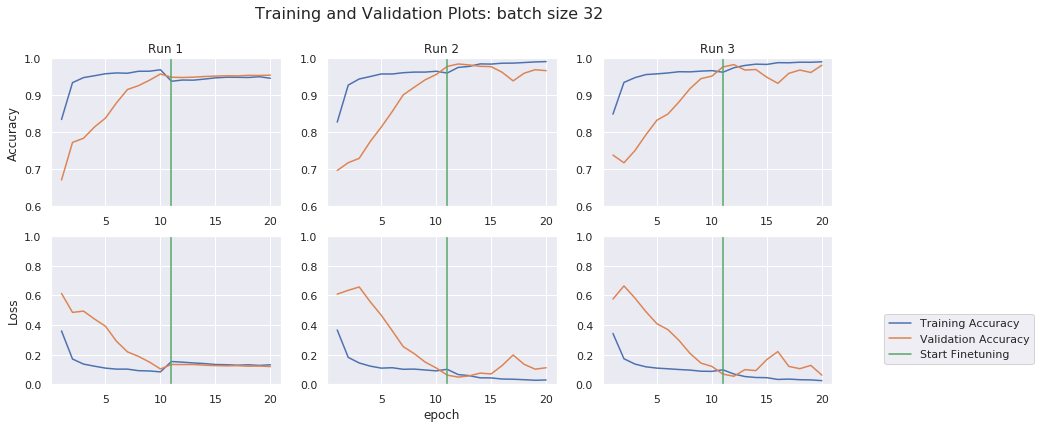

In [0]:
plot_batch_runs(32)

For each run, the validation accuracy matches the training accuracy after 20 epochs. We also see that the generalization gap is small when the batch size is 32.

### Figure B

Here we plot the training and validation accuracy for each batch size. The three runs are shown together.


In [0]:
#@title
df_bs16 = pd.concat([df_bs16_run1, df_bs16_run2, df_bs16_run3])
df_bs32 = pd.concat([df_bs32_run1, df_bs32_run2, df_bs32_run3])
df_bs64 = pd.concat([df_bs64_run1, df_bs64_run2, df_bs64_run3])
df_bs128 = pd.concat([df_bs128_run1, df_bs128_run2, df_bs128_run3])

In [0]:
def plot_bs_perfomance(bs=16, data=df_bs16): 
  
  hue = 'bs'+str(bs)
  signal = ['accuracy', 'val_accuracy']
  fig, axes = plt.subplots(1,2, figsize=(10, 3), sharex=True)
  fig.subplots_adjust(hspace=1.4)
  if bs==16:
    fig.suptitle('Effect of batch size on training performance',y=1.2, fontsize=16)
  
  for ax, signal in zip(axes.flatten(), signal):
      g = sns.lineplot(x='epoch', y=signal, hue=hue, data=data, ax=ax, legend=False)
      ax.axvline(11, label='start fine tuning', color='r')
      ax.set_title('Batch size = {}' .format(str(bs)))

 
  if bs==128:
       plt.legend(title='', labels=['run1', 'run2', 'run3', 'start finetuning'], loc='center right', bbox_to_anchor=(1.8, 0.5))
  #fig.tight_layout()
  fig.savefig("batch_size{}.png".format(bs))


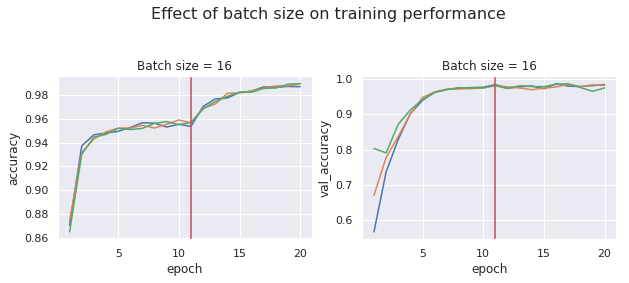

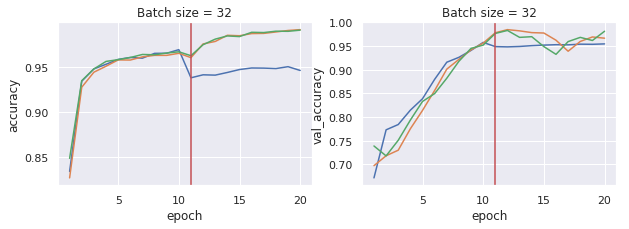

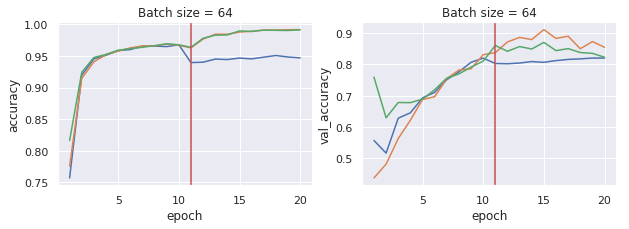

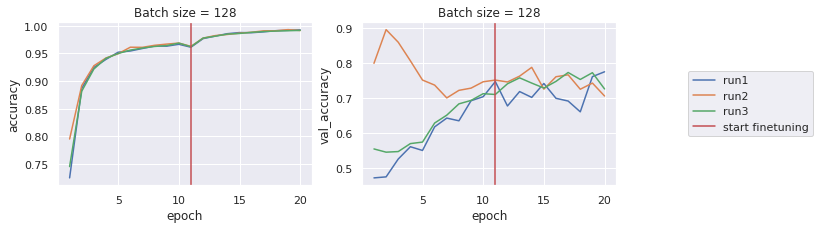

In [0]:
plot_bs_perfomance(16, df_bs16)
plot_bs_perfomance(32, df_bs32)
plot_bs_perfomance(64, df_bs64)
plot_bs_perfomance(128, df_bs128)

The three trial runs for each of the batch sizes is plotted. We observe :

1.  more variability  in test accuracy across the three runs than in the training accuracy  
2. this variation in test accuracy between runs increases as the  batch size increases
3. the variation between runs in training accuracy on the other hand, is smallest for batch size 128

### Figure C

Here we plot the training and validation accuracy (averaged over the three runs) for each of the batch sizes in a single plot.

In [0]:
df_bs16_mean = df_bs16.groupby('epoch').mean()
df_bs16_std = df_bs16.groupby('epoch').std()
df_bs32_mean = df_bs32.groupby('epoch').mean()
df_bs32_std = df_bs32.groupby('epoch').std()
df_bs64_mean = df_bs64.groupby('epoch').mean()
df_bs64_std = df_bs64.groupby('epoch').std()
df_bs128_mean = df_bs128.groupby('epoch').mean()
df_bs128_std = df_bs128.groupby('epoch').std()

In [0]:
df_bs16_mean['bs'] = 'bs 16'
df_bs16_mean.reset_index(inplace=True)
df_bs32_mean['bs'] = 'bs 32'
df_bs32_mean.reset_index(inplace=True)
df_bs64_mean['bs'] = 'bs 64'
df_bs64_mean.reset_index(inplace=True)
df_bs128_mean['bs'] = 'bs 128'
df_bs128_mean.reset_index(inplace=True)

In [0]:
df_bs16_mean.head()

,epoch,accuracy,loss,val_accuracy,val_loss,bs
0,1,0.870048,0.295384,0.680046,0.673205,bs 16
1,2,0.932976,0.165701,0.768253,0.529666,bs 16
2,3,0.944667,0.140692,0.845948,0.364528,bs 16
3,4,0.947929,0.131069,0.905390,0.231925,bs 16
4,5,0.951095,0.124389,0.943138,0.147044,bs 16


In [0]:

df_bs_mean = pd.concat([df_bs16_mean, df_bs32_mean, df_bs64_mean, df_bs128_mean])

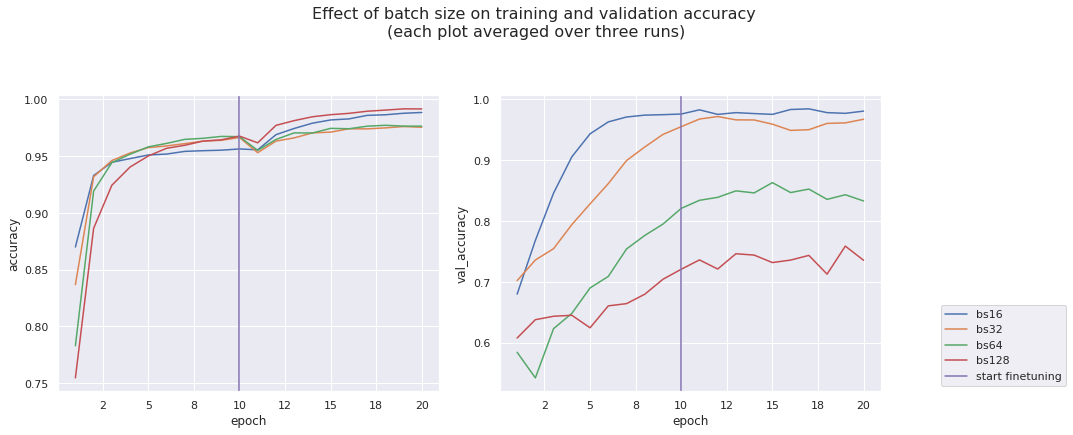

In [0]:
signal = ['accuracy', 'val_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(hspace=1.2)

for ax, signal in zip(axes.flatten(), signal):
    sns.lineplot(x='epoch', y=signal, hue='bs', data=df_bs_mean, ax=ax, legend=False)
    ax.axvline(10, label='start fine tuning', color="m")
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

fig.suptitle('Effect of batch size on training and validation accuracy \n'
             '(each plot averaged over three runs)', y=1.2, fontsize=16)
plt.legend(title='', labels=['bs16', 'bs32', 'bs64', 'bs128', 'start finetuning'], 
           loc='lower right', bbox_to_anchor=(1.5, 0.0))
fig.tight_layout()
fig.savefig("batch_size_2.png")

### Figure D

Here we plot the training and validation accuracy (averaged over the three runs) as a function of batch size. The results shown are at two time slices: 15 epochs and 20 epochs.

In [0]:
df_20_trend = df_bs_mean[df_bs_mean['epoch']==20].assign(batch_size=[16,32,64,128])
df_15_trend = df_bs_mean[df_bs_mean['epoch']==15].assign(batch_size=[16,32,64,128])

df_bs_trend = pd.concat([df_15_trend, df_20_trend])
df_bs_trend.head()

,epoch,accuracy,loss,val_accuracy,val_loss,bs,batch_size
14,15,0.981976,0.049449,0.975057,0.070799,bs 16,16
14,15,0.971244,0.073759,0.959002,0.121026,bs 32,32
14,15,0.974550,0.067539,0.863040,0.420763,bs 64,64
14,15,0.986616,0.035537,0.731867,0.951726,bs 128,128
19,20,0.988548,0.032506,0.980409,0.058980,bs 16,16


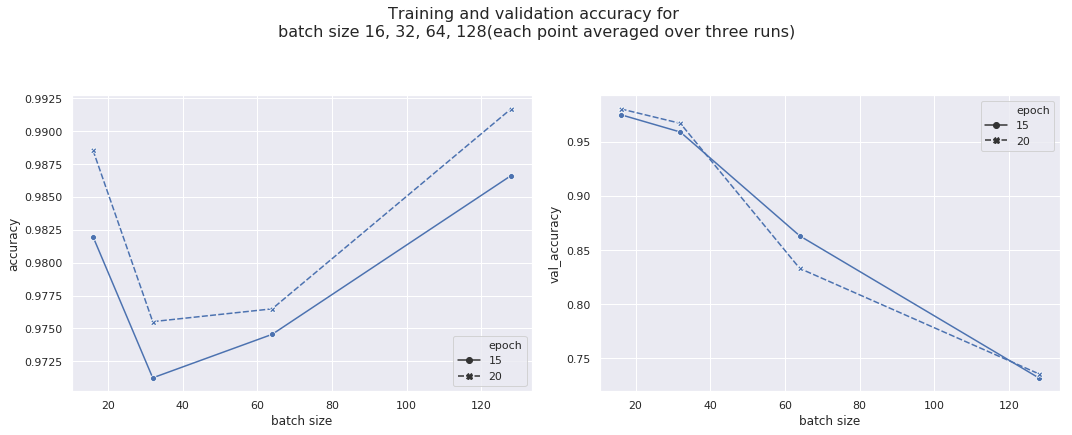

In [0]:

signal = ['accuracy', 'val_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for ax, signal in zip(axes.flatten(), signal):
    sns.lineplot(x='batch_size', y=signal, style='epoch',
                 markers=True, data=df_bs_trend, ax=ax)
    ax.set_xlabel('batch size')
    

fig.suptitle('Training and validation accuracy for \n'
             'batch size 16, 32, 64, 128'
             '(each point averaged over three runs)', y=1.2, fontsize=16)
fig.tight_layout()
fig.savefig("batch_size_3.png")

In [0]:
from google.colab import files

files.download("batch_size_2.png")
files.download("batch_size_3.png")

## Results

From figures A - D above, we can clearly see that the training and validation accuracy plots are different. In particular:

- the training accuracy across the batch sizes falls in a tight range (0.97 - 0.99) 
- there is a much larger difference in validation accuracy (from 0.98 - 0.74) 

- the training accuracy plot suggests that the accuracy is higher for a larger batch size
- the validation accuracy plot shows a definite trend with batch size = 16 having the highest accuracy and batch size = 128 having the lowest.



## Conclusion

This exercise is a first step in the empirical analysis of the generalization gap with respect to the batch size. The results show a consistent trend where the generalization gap increases with mini-batch size. These observations are in line with  results in the published literature.

## References and Further Reading

<a name="ref1"></a>[1] [Keskar, N.S., et al. "On Large-Batch Training for Deep Learning: Generalization Gap and Sharp Minima." arXiv preprint arXiv:1609.04836 (2016).](http://arxiv.org/abs/1609.04836)

<a name="ref2"></a>[2] [Goyal, P., et al. "Accurate, Large Minibatch {SGD:} Training ImageNet in 1 Hour" arXiv preprint arXiv:1706.02677 (2017).](http://arxiv.org/abs/1706.02677)

<a name="ref3"></a>[3] [Jain, Rishabh et al., "CIFAR-10 Classification using Intel® Optimization for TensorFlow*", May 29, 2018.](https://software.intel.com/en-us/articles/cifar-10-classification-using-intel-optimization-for-tensorflow)


**Author:  Meena Mani  
Email:   meenas.mailbag@gmail.com   
Twitter: @meena_uvaca  **  